# SF2935 Project

This is a low-data event, namely we are gven 500 training samples. The dataset comprises of songs, and each row is sample song, which is represented by a an 11-D Vector which account for 11 features - !!!TODO Write them here

In [31]:
import numpy as np #oy

import matplotlib.pyplot as plt

import scipy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

seed = 42

## TODO

- __Pre-processing__
    - [ ] Relevance determination of features
    - [ ] Visualize dataset
    - [ ] Split into training and test sets
    
- __Models__
    - [ ] Logistic regression
    - [ ] Discriminant analysis (LDA, QDA)
    - [ ] k-Nearest neighbours
    - [ ] Support vector machines
    - [ ] Tree based methods 
    - [ ] Neural networks

- __Model validation and tuning__
    - [ ] k-Cross validation
    - [ ] Confusion matrix analysis
    - [ ] Bayesian optimization of hyper-parameters
    - [ ] Relevance determination

- __Extras__
    - [ ] Used GAN to generate data to improve neural network classification

In [3]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [  0.545,   0.884,   5.   , ...,   0.641,  86.049,   1.   ],
       [  0.795,   0.545,   7.   , ...,   0.809,  91.967,   1.   ],
       ...,
       [  0.627,   0.583,   5.   , ...,   0.299, 129.674,   0.   ],
       [  0.446,   0.468,  11.   , ...,   0.223, 169.983,   0.   ],
       [  0.693,   0.666,  10.   , ...,   0.651,  92.015,   0.   ]])

242

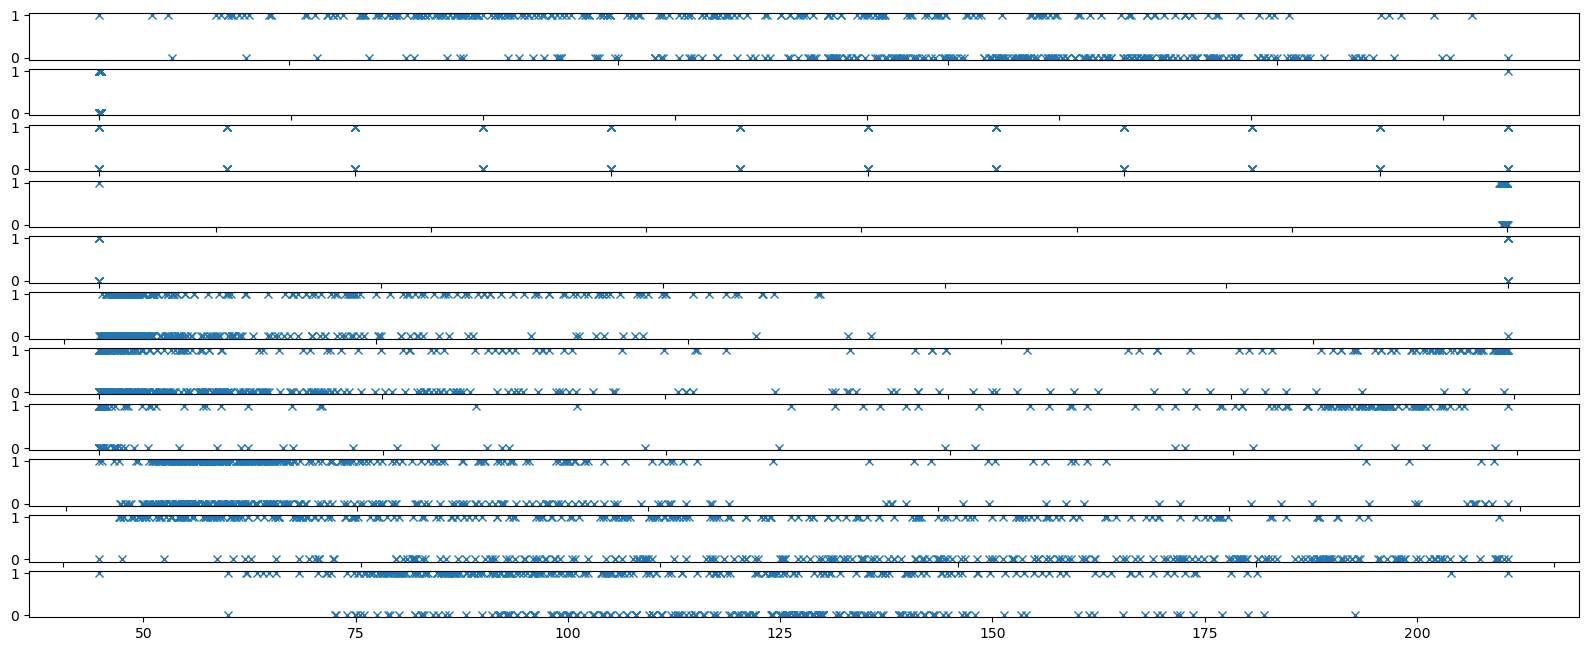

In [30]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset  = dataset[~np.isnan(dataset).any(axis=1)]

features = ['danceability', 'energy','key','loudness','mode','speechniess','acousticness','instrumentalness','liveness','valence','tempo']

x = dataset[:,0:-1]
y = dataset[:,-1]

fig, axs = plt.subplots(len(features))
for i in range(len(features)):
    axs[i].plot(x[:,i],y,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 

#No. datapoints from each class.
nClass0 = sum(y==0)
nClass1 = sum(y==1)

In [5]:
x[:,2]

array([ 5.,  7.,  5.,  4., 11.,  1.,  1.,  5.,  7.,  9.,  4.,  7., 11.,
        8.,  2.,  2.,  3.,  2.,  0.,  2.,  7.,  2.,  9.,  4.,  9.,  4.,
        9.,  9.,  0.,  0.,  0.,  1., 11.,  8.,  9.,  0.,  4.,  0.,  4.,
       11., 11., 10.,  4.,  1.,  2.,  8.,  1.,  1.,  1., 10.,  6.,  1.,
        5., 10.,  0.,  4.,  0.,  7.,  0., 10., 11.,  7.,  1.,  8.,  7.,
        6.,  5.,  1.,  1.,  8.,  2.,  6.,  8., 11.,  9.,  6.,  5.,  5.,
        3.,  2.,  1., 11., 11.,  0.,  1.,  0., 11., 11.,  5.,  1.,  9.,
        5.,  7.,  3.,  0.,  0.,  1.,  7.,  9.,  7.,  0.,  0.,  0.,  2.,
       11.,  0.,  7.,  0.,  4.,  0.,  0.,  4.,  1.,  1.,  7.,  5.,  1.,
        8.,  9., 10., 11.,  2.,  1.,  0.,  7.,  1.,  2.,  9., 11.,  2.,
        3.,  1., 11.,  6.,  1.,  8.,  6.,  1.,  0., 10., 10., 11.,  2.,
        7.,  1.,  1.,  8.,  2.,  0.,  7.,  4.,  4.,  1.,  9.,  5.,  7.,
        7.,  2.,  2.,  7.,  7.,  7.,  2., 11.,  7., 11., 10.,  7., 11.,
        6.,  5.,  1.,  1.,  0.,  1., 10., 11.,  1.,  1.,  5.,  4

In [6]:
# Scaling the input features, then splitting into training and testing dataset
scaler   = StandardScaler()
scaler.fit(x)
dataset  = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

## Logistic regression

In [7]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8099173553719008


### $k$-neighbors

In [8]:
len(x_train)

362

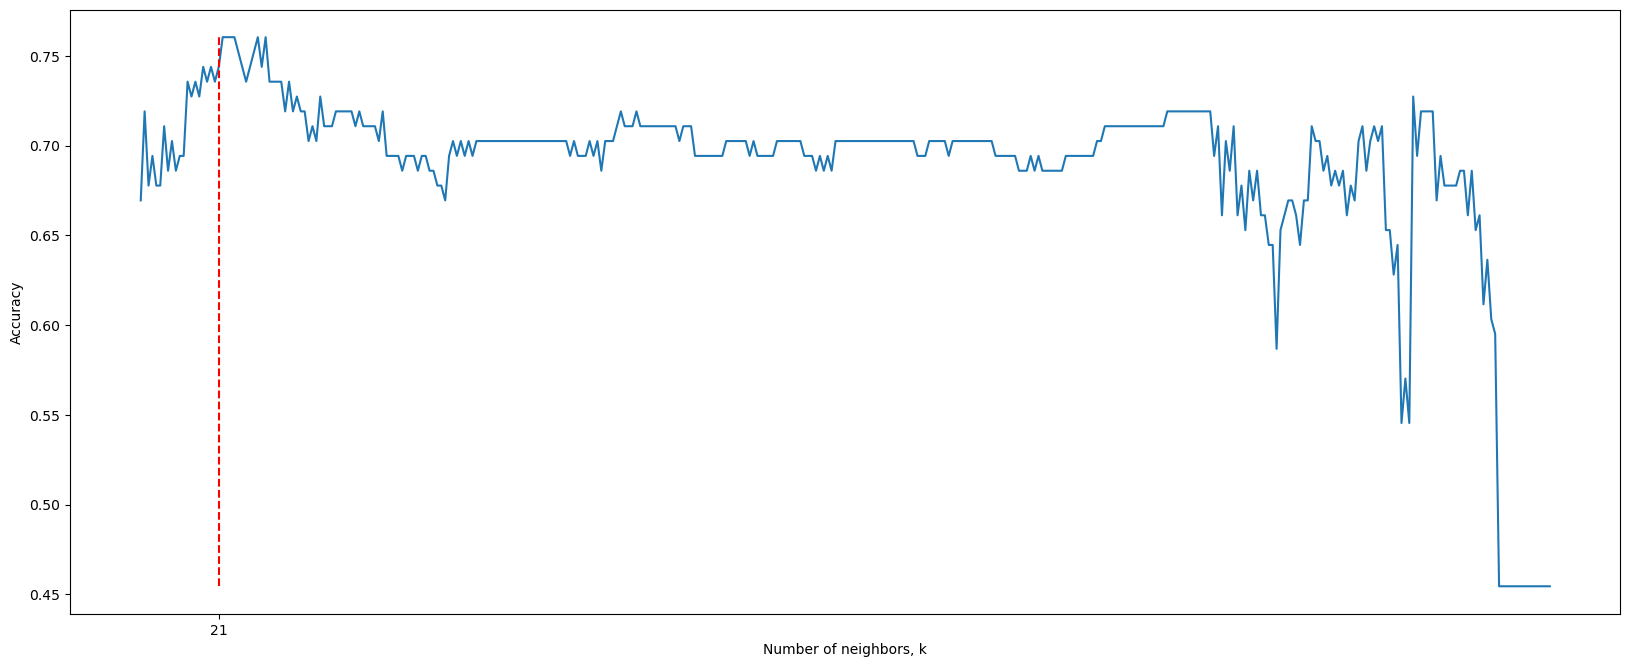

In [13]:
acc_list = []
for k in range(1,len(x_train)+1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
max_acc = max(acc_list)
opt_k = acc_list.index(max_acc)
plt.plot(range(1,len(x_train)+1),acc_list,[opt_k,opt_k],[min(acc_list),max_acc],'r--')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
locs, labels = plt.xticks()
plt.xticks([opt_k])
plt.show()

In [14]:
labels

<a list of 10 Text major ticklabel objects>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 35
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.7355371900826446


## Linear Discriminant Analysis (Anton)

In [54]:
#Assumes that the proportion of probabilites is 0.5
lda = LinearDiscriminantAnalysis() #Creates LDA instance.
lda.fit(x_train,y_train) #Training.
lda_predictions = lda.predict(x_test) #The predictions for the test set.
print('Accuracy of LDA is: ',metrics.accuracy_score(y_test,lda_predictions))

Accuracy of LDA is:  0.8181818181818182


## Quadratic Discriminant Analysis (Nazaal)

## k-Nearest neighbours (Viktor)

## Support Vector Machines (Viktor)

## Tree based methods (Anton)

## Neural networks (Nazaal)